# Controlling quality and kinetics of ASD drying processes 
This notebook reproduces the data, modellings and predictions from the Paper 'Controlling quality and kinetics of ASD drying processes' from Kerkhoff et al.. The index w denotes water, e denotes ethanol, a denotes the API and p denotes the polymer
In this notebook, the parameters are defined all at once while their context is given in the consecutive cells
This is the version which neglects non-idealities modeled by PC-SAFT

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS
import matplotlib.pyplot as plt

T=303.15
p=1E5
Dwe=1E-6/100 # Water Ethanol diffusion coefficient. It is just the highest value to achieve that diffusion of water through ethanol is not rate limiting
Dwa=1.13E-8/15 # water polymer diffusion coefficient
Dwp=1.13E-8/15 # water api diffusion coefficient. Just chosen to be the same as the polymer 
Dep=4.318E-7/5 # ethanol  polymer diffusion coefficient. 
Dea=4.318E-7/5 # ethanol api diffusion coefficient. . Just chosen to be the same as the polymer 
Dpa=1.00E-21 
Dvec=np.asarray([Dwe,Dwp,Dwa,Dep,Dea,Dpa])
mobile=np.asarray([True,True,False,False])
tauw=35711.02587 # mass transfer coefficient of water
taue=14926.924 # mass transfer coefficient of ethanol
taui=np.asarray([tauw,taue])
t=np.linspace(0.,(60*2000)**0.5,51)**2
L=0.016 
nz=20

(0.0, 0.2)

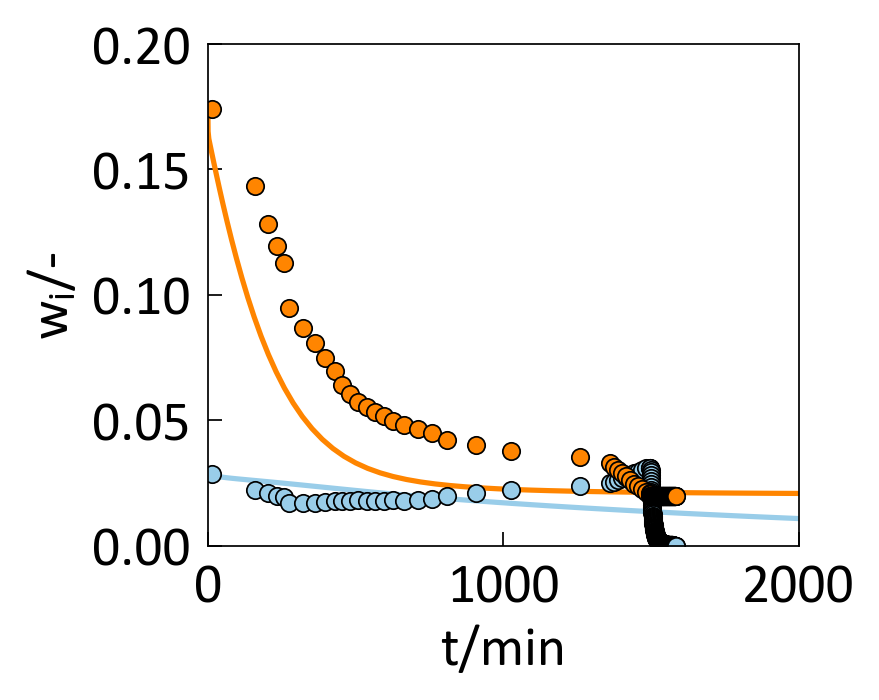

In [5]:
L=0.0185 
dl0=0.3
we0=0.17403
ww0=0.02849
wf0=1-we0-ww0
wi0=np.asarray([ww0,we0,dl0*wf0,(1-dl0)*wf0])

we8=0.01973
ww8=1E-5
wf8=1-we8-ww8
wi8=np.asarray([ww8,we8,dl0*wf8,(1-dl0)*wf8])

relaxpar={
    'EJ':np.asarray([1E11]),
    'etaJ':np.asarray([1E14]),
    'exponent':np.asarray([0.])}
    
wt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,**relaxpar)[0]

texp=np.asarray([15.11355,159.82791,203.51851,233.5965,256.93881,273.51673,323.29707,362.37052,396.32636,429.85635,454.45627,482.24912,509.64278,537.30688,565.93174,595.71932,627.66682,663.98249,710.62817,757.13492,810.88765,909.29288,1026.16031,1258.05022,1360.43,1373.97,1387.56,1401.2,1414.88,1428.61,1442.39,1456.21,1470.08,1484,1497.96,1498.01,1498.34,1498.67,1499.01,1499.34,1499.67,1500.01,1500.34,1500.67,1501.01,1501.34,1501.67,1502.01,1502.34,1502.67,1503.01,1503.34,1503.67,1504.01,1504.34,1504.67,1505.01,1505.34,1505.67,1506.01,1506.34,1506.68,1507.01,1507.34,1507.68,1508.01,1508.34,1508.68,1509.01,1509.34,1509.68,1510.01,1510.34,1510.68,1511.01,1511.34,1511.68,1512.01,1512.34,1512.68,1513.01,1513.35,1513.68,1514.01,1514.35,1514.68,1515.01,1515.35,1515.68,1516.01,1516.35,1516.68,1517.01,1517.35,1517.68,1518.01,1518.35,1518.68,1519.01,1519.35,1519.68,1520.02,1520.35,1520.68,1521.02,1521.35,1521.68,1522.02,1522.35,1522.68,1523.02,1523.35,1523.68,1524.02,1524.35,1524.68,1525.02,1525.35,1525.69,1526.02,1526.35,1526.69,1527.02,1527.35,1527.69,1528.02,1528.35,1528.69,1529.02,1529.35,1529.69,1530.02,1530.35,1530.69,1531.02,1531.36,1531.69,1532.02,1532.36,1532.69,1533.02,1533.36,1533.69,1534.02,1534.36,1534.69,1535.02,1535.36,1535.69,1536.02,1536.36,1536.69,1537.02,1537.36,1537.69,1538.03,1538.36,1538.69,1539.03,1539.36,1539.69,1540.03,1540.36,1540.69,1541.03,1541.36,1541.69,1542.03,1542.36,1542.69,1543.03,1543.36,1543.69,1544.03,1544.36,1544.7,1545.03,1545.36,1545.7,1546.03,1546.36,1546.7,1547.03,1547.36,1547.7,1548.03,1548.37,1548.7,1549.03,1549.37,1549.7,1550.03,1550.37,1550.7,1551.03,1551.37,1551.7,1552.03,1552.37,1552.7,1553.03,1553.37,1553.7,1554.03,1554.37,1554.7,1555.03,1555.37,1555.7,1556.04,1556.37,1556.7,1557.04,1557.37,1557.7,1558.04,1558.37,1558.7,1559.04,1559.37,1559.7,1560.04,1560.37,1560.7,1561.04,1561.37,1561.7,1562.04,1562.37,1562.7,1563.04,1563.37,1563.7,1564.04,1564.37,1564.71,1565.04,1565.37,1565.71,1566.04,1566.37,1566.71,1567.04,1567.37,1567.71,1568.04,1568.38,1568.71,1569.04,1569.38,1569.71,1570.04,1570.38,1570.71,1571.04,1571.38,1571.71,1572.04,1572.38,1572.71,1573.04,1573.38,1573.71,1574.04,1574.38,1574.71,1575.05,1575.38,1575.71,1576.05,1576.38,1576.71,1577.05,1577.38,1577.71,1578.05,1578.38,1578.71,1579.05,1579.38,1579.71,1580.05,1580.38,1580.72,1581.05,1581.38,1581.72,1582.05,1582.38,1582.72,1583.05,1583.38])
w1exp=np.asarray([0.02849,0.02237,0.021,0.01995,0.01935,0.01693,0.01721,0.0171,0.01746,0.01765,0.01793,0.01788,0.01814,0.01798,0.01788,0.01776,0.01804,0.01798,0.01808,0.0185,0.01998,0.02086,0.0223,0.02369,0.02508,0.02561,0.0264,0.02694,0.02739,0.02828,0.02899,0.02942,0.03005,0.03089,0.03101,0.03102,0.03104,0.03034,0.02936,0.02817,0.02692,0.0257,0.02453,0.02343,0.02236,0.02134,0.02039,0.01948,0.01861,0.01779,0.017,0.01626,0.01555,0.01488,0.01425,0.01365,0.01307,0.01254,0.01203,0.01154,0.01108,0.01064,0.01022,0.00982,0.00944,0.00908,0.00874,0.00841,0.0081,0.00781,0.00753,0.00726,0.007,0.00676,0.00653,0.00631,0.00609,0.00588,0.00569,0.0055,0.00532,0.00515,0.00498,0.00482,0.00467,0.00453,0.00439,0.00426,0.00413,0.00401,0.00389,0.00377,0.00367,0.00356,0.00346,0.00336,0.00327,0.00318,0.00309,0.00301,0.00293,0.00285,0.00277,0.0027,0.00263,0.00257,0.0025,0.00244,0.00238,0.00232,0.00226,0.0022,0.00215,0.0021,0.00204,0.00199,0.00195,0.0019,0.00186,0.00182,0.00177,0.00173,0.00169,0.00165,0.00162,0.00158,0.00155,0.00152,0.00148,0.00145,0.00142,0.00139,0.00136,0.00133,0.0013,0.00128,0.00125,0.00123,0.0012,0.00118,0.00116,0.00113,0.00111,0.00109,0.00107,0.00105,0.00103,0.001,9.86E-04,9.67E-04,9.48E-04,9.30E-04,9.11E-04,8.92E-04,8.73E-04,8.56E-04,8.42E-04,8.29E-04,8.14E-04,8.00E-04,7.87E-04,7.73E-04,7.58E-04,7.43E-04,7.31E-04,7.16E-04,7.03E-04,6.91E-04,6.80E-04,6.68E-04,6.55E-04,6.41E-04,6.26E-04,6.11E-04,5.99E-04,5.86E-04,5.76E-04,5.67E-04,5.57E-04,5.46E-04,5.38E-04,5.30E-04,5.19E-04,5.11E-04,5.02E-04,4.92E-04,4.82E-04,4.73E-04,4.65E-04,4.56E-04,4.50E-04,4.44E-04,4.35E-04,4.27E-04,4.19E-04,4.08E-04,4.00E-04,3.91E-04,3.83E-04,3.77E-04,3.73E-04,3.66E-04,3.60E-04,3.54E-04,3.48E-04,3.41E-04,3.35E-04,3.29E-04,3.25E-04,3.20E-04,3.14E-04,3.08E-04,3.04E-04,2.95E-04,2.87E-04,2.81E-04,2.76E-04,2.70E-04,2.68E-04,2.66E-04,2.62E-04,2.55E-04,2.51E-04,2.47E-04,2.41E-04,2.34E-04,2.30E-04,2.26E-04,2.22E-04,2.18E-04,2.14E-04,2.09E-04,2.05E-04,1.99E-04,1.95E-04,1.93E-04,1.93E-04,1.91E-04,1.86E-04,1.82E-04,1.78E-04,1.72E-04,1.65E-04,1.61E-04,1.59E-04,1.57E-04,1.55E-04,1.53E-04,1.53E-04,1.51E-04,1.47E-04,1.42E-04,1.40E-04,1.36E-04,1.32E-04,1.30E-04,1.26E-04,1.21E-04,1.17E-04,1.11E-04,1.05E-04,1.03E-04,9.84E-05,9.63E-05,9.63E-05,9.42E-05,9.21E-05,9.00E-05,8.58E-05,8.16E-05,7.75E-05,7.12E-05,6.70E-05,6.49E-05,6.28E-05,6.07E-05,5.86E-05,5.65E-05,5.23E-05,4.81E-05,4.40E-05,3.77E-05,3.14E-05,2.93E-05,2.72E-05,2.51E-05,2.51E-05,2.51E-05,2.30E-05,1.88E-05,1.46E-05,1.05E-05])
w2exp=np.asarray([0.17403,0.14344,0.12835,0.1193,0.11279,0.09476,0.08693,0.08086,0.07497,0.06956,0.06428,0.06066,0.05749,0.05522,0.0533,0.05158,0.04965,0.04819,0.04667,0.04493,0.04223,0.04014,0.03759,0.03521,0.0329,0.03152,0.03002,0.02885,0.02774,0.02612,0.02475,0.02369,0.02249,0.02125,0.02091,0.02052,0.01994,0.01986,0.01979,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973,0.01973])
w3exp=1-w2exp-w1exp

fig,ax=plt.subplots()
ax.plot(t/60,wt[:,0],'C1-')
ax.plot(t/60,wt[:,1],'C3-')
# ax.plot(t/60,wt[:,2]+wt[:,3],'C0-')
ax.plot(texp,w1exp,'C1o')
ax.plot(texp,w2exp,'C3o')
# ax.plot(texp,w3exp,'C0o')
ax.set_xlabel("t/min")
ax.set_ylabel("$w_i$/-")

plt.xlim([0,2000])
plt.ylim([0,0.2])